In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dataset.main import DatasetGenerator
import numpy as np
import sys

In [3]:
dataset = DatasetGenerator(small=True, samples=50000, number_person=100, max_foods_per_person=30, distribution="zipf", place=False, day=False, dataset_folder='dataset/data/')

In [4]:
dataset.generate_probabilities()

In [5]:
dataset.sampled_names

['Melessa',
 'Archibald',
 'Melosa',
 'Say',
 'Giorgi',
 'Morry',
 'Janice',
 'Shaun',
 'Jackelyn',
 'Reena',
 'Zeb',
 'Shaina',
 'Kale',
 'Gregor',
 'Devland',
 'Modesty',
 'Isadora',
 'Stevy',
 'Rossy',
 'Dyana',
 'Carin',
 'Ferdinande',
 'Jonis',
 'Karisa',
 'Jehu',
 'Claudette',
 'Franky',
 'Filberto',
 'Obed',
 'Walt',
 'Roch',
 'Alyce',
 'Frieda',
 'Yankee',
 'Shellie',
 'Carter',
 'Florencia',
 'Virginie',
 'Kit',
 'Kalinda',
 'Mendie',
 'Adriena',
 'Shane',
 'Sergei',
 'Leland',
 'Staffard',
 'Ezmeralda',
 'Xaviera',
 'Marcia',
 'Enos',
 'Kary',
 'Zedekiah',
 'Waylin',
 'Abbye',
 'Baxie',
 'Ricoriki',
 'Annmaria',
 'Floria',
 'Dietrich',
 'Alexander',
 'Peta',
 'Cherice',
 'Philomena',
 'Debi',
 'Dominique',
 'Reinhold',
 'Correna',
 'Wilburt',
 'Guillemette',
 'Hanna',
 'Paulie',
 'Kayley',
 'Shawna',
 'Vladimir',
 'Jermayne',
 'Mella',
 'Zechariah',
 'Marian',
 'Anatollo',
 'Gray',
 'Emmit',
 'Laurence',
 'Timotheus',
 'Matthieu',
 'Gilly',
 'Rennie',
 'Natalina',
 'Clementin

In [6]:
dataset.distributions_per_name['Shane']

{'food': ['polenta',
  'chili',
  'soup dumplings',
  'boston cream pie',
  'lasagna',
  'sausage roll',
  'gyros',
  'scallops',
  'tex-mex',
  'ceviche',
  'masala dosa',
  'osso buco',
  'gingerbread',
  'lomo saltado',
  'swordfish',
  'pulled pork sandwich',
  'seaweed salad',
  'spring rolls',
  'chicken curry',
  'pilaf',
  'hot dog',
  'aloo gobi',
  'beef wellington',
  'ravioli',
  'garlic bread',
  'onion rings',
  'roast chicken',
  'currywurst',
  'cornbread',
  'chicken quesadilla'],
 'prob': array([0.62028963, 0.15507241, 0.06892107, 0.0387681 , 0.02481159,
        0.01723027, 0.01265897, 0.00969203, 0.0076579 , 0.0062029 ,
        0.00512636, 0.00430757, 0.00367035, 0.00316474, 0.00275684,
        0.00242301, 0.00214633, 0.00191447, 0.00171825, 0.00155072,
        0.00140655, 0.00128159, 0.00117257, 0.00107689, 0.00099246,
        0.00091759, 0.00085088, 0.00079119, 0.00073756, 0.00068921])}

In [7]:
dataset.generate()

In [8]:
dataset.tokenize()

In [9]:
dataset.dataset[:20]

['Virginie had broccoli cheddar soup',
 'Vladimir had roulade',
 'Modesty had fried chicken',
 'Morry had cup cakes',
 'Peta had beef carpaccio',
 'Melosa had upside down cake',
 'Matthieu had swordfish',
 'Rossy had frittata',
 'Roch had teriyaki chicken',
 'Sergei had lemon meringue pie',
 'Cherice had cheeseburger',
 'Walt had mojito',
 'Staffard had lomo saltado',
 'Dyana had honey cake',
 'Alexander had beef stroganoff',
 'Peta had pad thai',
 'Janice had pho',
 'Cordelie had bundt cake',
 'Roch had teriyaki chicken',
 'Guillemette had monkey bread']

In [10]:
dataset.dataset_splitted[:20]

[['Virginie', 'broccoli cheddar soup'],
 ['Vladimir', 'roulade'],
 ['Modesty', 'fried chicken'],
 ['Morry', 'cup cakes'],
 ['Peta', 'beef carpaccio'],
 ['Melosa', 'upside down cake'],
 ['Matthieu', 'swordfish'],
 ['Rossy', 'frittata'],
 ['Roch', 'teriyaki chicken'],
 ['Sergei', 'lemon meringue pie'],
 ['Cherice', 'cheeseburger'],
 ['Walt', 'mojito'],
 ['Staffard', 'lomo saltado'],
 ['Dyana', 'honey cake'],
 ['Alexander', 'beef stroganoff'],
 ['Peta', 'pad thai'],
 ['Janice', 'pho'],
 ['Cordelie', 'bundt cake'],
 ['Roch', 'teriyaki chicken'],
 ['Guillemette', 'monkey bread']]

In [11]:
dataset.dataset_tokenized[:20]


[[0, 1],
 [2, 3],
 [4, 5],
 [6, 7],
 [8, 9],
 [10, 11],
 [12, 13],
 [14, 15],
 [16, 17],
 [18, 19],
 [20, 21],
 [22, 23],
 [24, 25],
 [26, 27],
 [28, 29],
 [8, 30],
 [31, 32],
 [33, 34],
 [16, 17],
 [35, 36]]

In [12]:
dataset.vocabulary_size

411

In [13]:
import torch

## split the tokenized dataset into training and testing
# dataset.split()

## get the training and testing datasets
train_dataset = [torch.tensor(x, dtype=torch.long) for x in dataset.dataset_tokenized]
# test_dataset =  [torch.tensor(x, dtype=torch.long) for x in dataset.test]

In [14]:
len(train_dataset)

50000

In [15]:
from torch.utils.data import Dataset

## create a dataset class
class MyDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Assuming each item in data is a sequence and we use the same sequence shifted by one as the target
        x = torch.tensor(self.data[idx][:-1], dtype=torch.long)
        y = torch.tensor(self.data[idx][1:], dtype=torch.long)
        return x, y


## create the datasets
train_data = MyDataset(train_dataset)
# test_data = MyDataset(test_dataset)

print(train_data)

In [16]:
train_data[11]

C:\Users\leonp\AppData\Local\Temp\ipykernel_40868\3354736818.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(self.data[idx][:-1], dtype=torch.long)
C:\Users\leonp\AppData\Local\Temp\ipykernel_40868\3354736818.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(self.data[idx][1:], dtype=torch.long)


(tensor([22]), tensor([23]))

In [17]:
## import mingpt
sys.path.append('minGPT/')
from mingpt.model import GPT
from mingpt.utils import set_seed
set_seed(42)

model_config = GPT.get_default_config()
model_config.n_layer=12
model_config.n_head=8
model_config.n_embd=512
model_config.vocab_size = dataset.vocabulary_size
model_config.model_type = None
model_config.block_size = 1
model = GPT(model_config)

number of parameters: 38.04M


In [18]:
# create a Trainer object
from mingpt.trainer import Trainer

train_config = Trainer.get_default_config()
train_config.learning_rate = 5e-5 # the model we're using is so small that we can go a bit faster
train_config.max_iters = 20000
train_config.num_workers = 0
trainer = Trainer(train_config, model, train_data)

running on device cuda


In [19]:
def batch_end_callback(trainer):
    if trainer.iter_num % 1000 == 0:
        print(f"iter_dt {trainer.iter_dt * 1000:.2f}ms; iter {trainer.iter_num}: train loss {trainer.loss.item():.5f}")
trainer.set_callback('on_batch_end', batch_end_callback)

trainer.run()

C:\Users\leonp\AppData\Local\Temp\ipykernel_40868\3354736818.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(self.data[idx][:-1], dtype=torch.long)
C:\Users\leonp\AppData\Local\Temp\ipykernel_40868\3354736818.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(self.data[idx][1:], dtype=torch.long)


iter_dt 0.00ms; iter 0: train loss 6.12316
iter_dt 37.59ms; iter 1000: train loss 2.08011
iter_dt 37.03ms; iter 2000: train loss 1.71424
iter_dt 37.03ms; iter 3000: train loss 1.76903
iter_dt 38.04ms; iter 4000: train loss 1.68827
iter_dt 37.03ms; iter 5000: train loss 1.54193
iter_dt 41.55ms; iter 6000: train loss 1.84635
iter_dt 36.53ms; iter 7000: train loss 1.88027
iter_dt 38.03ms; iter 8000: train loss 1.47804
iter_dt 37.53ms; iter 9000: train loss 1.54123
iter_dt 37.52ms; iter 10000: train loss 1.61662
iter_dt 37.61ms; iter 11000: train loss 1.47526
iter_dt 36.05ms; iter 12000: train loss 1.44035
iter_dt 37.53ms; iter 13000: train loss 1.41256
iter_dt 36.11ms; iter 14000: train loss 1.89179
iter_dt 36.03ms; iter 15000: train loss 1.79635
iter_dt 37.04ms; iter 16000: train loss 1.35652
iter_dt 36.72ms; iter 17000: train loss 1.72719
iter_dt 36.45ms; iter 18000: train loss 2.07125
iter_dt 37.03ms; iter 19000: train loss 1.21969


In [20]:
# now let's perform some evaluation
model.eval()

GPT(
  (transformer): ModuleDict(
    (wte): Embedding(411, 512)
    (wpe): Embedding(1, 512)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x Block(
        (ln_1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (attn): CausalSelfAttention(
          (c_attn): Linear(in_features=512, out_features=1536, bias=True)
          (c_proj): Linear(in_features=512, out_features=512, bias=True)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (mlp): ModuleDict(
          (c_fc): Linear(in_features=512, out_features=2048, bias=True)
          (c_proj): Linear(in_features=2048, out_features=512, bias=True)
          (act): NewGELU()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_fe

In [21]:
## get the size of the testing dataset
# n = len(test_data)

# y_gen_all = []

# ## generate n sequences
# for i in range(n):
#     x, y = test_data[i]
#     x = x.unsqueeze(0)
#     decoded = dataset.decode(test_dataset[i].numpy())
#     y_gen = model.generate(x, 1, do_sample=True)
#     y_gen = y_gen.squeeze(0).cpu().numpy()
#     y_gen = dataset.decode(y_gen)
#     y_gen_all.append(y_gen)


# ## group the generated sequences by the first word
# grouped = {}
# for y_gen in y_gen_all:
#     first_word = y_gen[0]
#     if first_word not in grouped:
#         grouped[first_word] = []
#     grouped[first_word].append(y_gen)

# ## print the generated sequences
# ## check if it exists (accuracy)

# wrong = 0
# all = 0
# for key in grouped:
#     print(key)
#     for seq in grouped[key]:
#         print(seq)
#         if seq not in dataset.dataset_splitted:
#             wrong += 1

#         all += 1
#     print('\n')

# print('wrong / all', wrong / all)

# Generate sequences for every name

In [22]:
from tqdm import tqdm
import pandas as pd

In [23]:
n_sequences = 1000
collected_generations = []

for name in ['Melessa']: # dataset.sampled_names:
    name_tokenized = dataset.word2id[name]
    print(name, name_tokenized)
    for _ in tqdm(range(n_sequences)):
        x = torch.Tensor([name_tokenized]).unsqueeze(0).long().to("cuda")
        y_gen = model.generate(x, 1, do_sample=True)
        food_item = dataset.decode([y_gen[0][1]])[0]
        collected_generations.append({'name': name, 'food': food_item})

Melessa 66


100%|██████████| 1000/1000 [00:13<00:00, 76.38it/s]


In [24]:
generations_df = pd.DataFrame(collected_generations)
generations_df

,name,food
0,Melessa,focaccia
1,Melessa,caramel apple
2,Melessa,caramel apple
3,Melessa,pumpkin pie
4,Melessa,caramel apple
...,...,...
995,Melessa,caramel apple
996,Melessa,caramel apple
997,Melessa,focaccia
998,Melessa,caramel apple


In [25]:
melessa_df = generations_df[generations_df['name'] == 'Melessa']

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming melessa_df is a DataFrame with a 'food' column that includes observed food data
food_counts = melessa_df['food'].value_counts()
food_counts = dict(food_counts / food_counts.sum())

true_food_names = [d.strip() for d in dataset.distributions_per_name['Melessa']['food']]
true_food_probabilities = dataset.distributions_per_name['Melessa']['prob']
true_probabilities = dict(zip(true_food_names, true_food_probabilities))

generated_probabilities = [d for d in dataset.dataset_splitted if d[0] == 'Melessa']
generated_probabilities = pd.DataFrame(generated_probabilities)[1].value_counts()
generated_probabilities = dict(generated_probabilities / generated_probabilities.sum())

for food in food_counts.keys():
    if food not in true_probabilities:
        true_probabilities[food] = 0
        
    if food not in generated_probabilities:
        generated_probabilities[food] = 0

for food in true_probabilities.keys():
    if food not in food_counts:
        food_counts[food] = 0

    if food not in generated_probabilities:
        generated_probabilities[food] = 0

In [27]:
comparison_df = pd.DataFrame({'food': true_probabilities.keys()})
comparison_df['generated_distribution'] = comparison_df['food'].apply(lambda x: food_counts[x])
comparison_df['training_data_distribution'] = comparison_df['food'].apply(lambda x: generated_probabilities[x])
comparison_df['true_distribution'] = comparison_df['food'].apply(lambda x: true_probabilities[x])
comparison_df = comparison_df.set_index('food')

In [28]:
s = 0
for i, item, in enumerate(food_counts):
    if i == 30:
        break
    s += abs(food_counts[item] - true_food_probabilities[i])
print(s)

0.09713333666356226


In [29]:
comparison_df

,generated_distribution,training_data_distribution,true_distribution
food,,,
caramel apple,0.590,0.636023,0.620290
focaccia,0.084,0.127580,0.155072
hash browns,0.134,0.067542,0.068921
fondue,0.034,0.045028,0.038768
rocky road ice cream,0.012,0.028143,0.024812
...,...,...,...
danish pastry,0.001,0.000000,0.000000
grilled salmon,0.001,0.000000,0.000000
rotisserie chicken,0.001,0.000000,0.000000


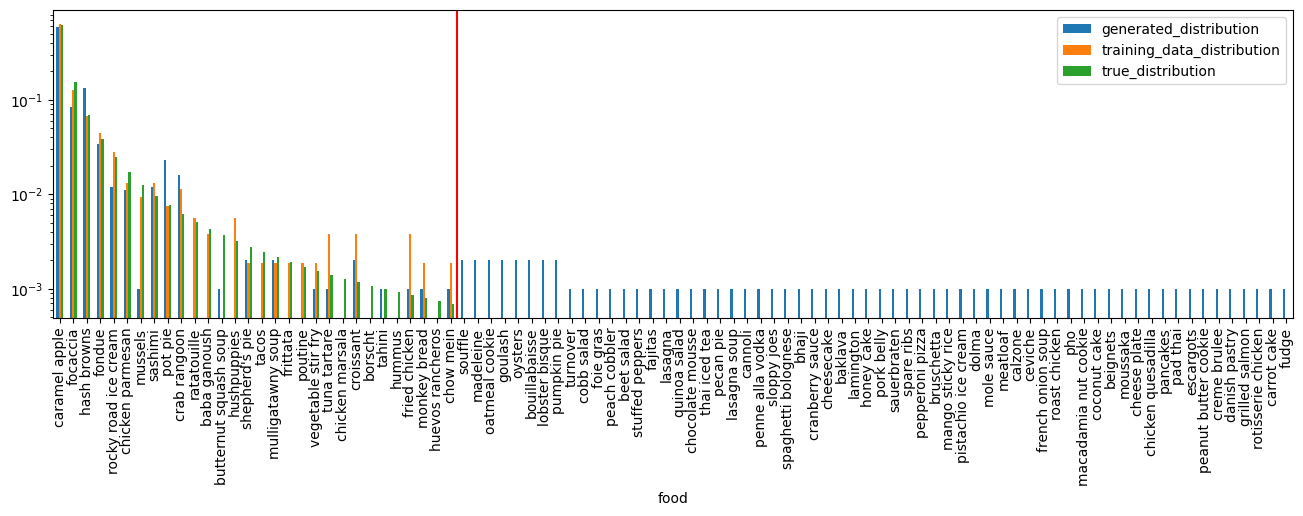

In [30]:
comparison_df.plot.bar(figsize=(16, 4))
plt.yscale("log")
plt.axvline(30 - 0.5, color='red')

In [31]:
# Only for melessa
hallucination_rate = len(melessa_df[~melessa_df['food'].isin(true_food_names)]) / len(melessa_df)
hallucination_rate

0.07

In [32]:
generated_foods = pd.Series([str(d) for d in dataset.dataset_splitted])

# Number of Facts that appear exactly once in dataset
monofact_number = np.sum(generated_foods.value_counts() == 1)
monofact_rate = monofact_number / len(dataset.dataset_splitted)
monofact_rate

0.0127

In [33]:
n_sequences = 100
from collections import defaultdict
collected_generations = defaultdict(lambda: 0)

for name in dataset.sampled_names:
    name_tokenized = dataset.word2id[name]
    for _ in range(n_sequences):
        x = torch.Tensor([name_tokenized]).unsqueeze(0).long().to("cuda")
        y_gen = model.generate(x, 1, do_sample=True)
        food_item = dataset.decode([y_gen[0][1]])[0]
        collected_generations[food_item] += 1

In [34]:
for item in collected_generations:
    collected_generations[item] /= (n_sequences * len(dataset.sampled_names))

In [35]:
dataset_foods = defaultdict(lambda: 0)
for item in dataset.dataset_tokenized:
    food_item = dataset.decode(item)[-1]
    dataset_foods[food_item] += 1

dataset_food_distribution = defaultdict(lambda: 0)
for item in dataset_foods:
    dataset_food_distribution[item] = dataset_foods[item] / sum(dataset_foods.values())

In [39]:
s = 0
for key in collected_generations:
    s += abs(collected_generations[key] - dataset_food_distribution[key])
    print(key, collected_generations[key], dataset_food_distribution[key])

caramel apple 0.0087 0.0087
focaccia 0.0034 0.00352
pot pie 0.0031 0.00236
crab rangoon 0.0004 0.00048
hash browns 0.0077 0.00642
goulash 0.0016 0.00108
nachos 0.0099 0.01022
hummus 0.0003 0.00032
quinoa salad 0.002 0.00188
fondue 0.0008 0.00078
mussels 0.0007 0.00038
sashimi 0.0019 0.0016
rotisserie chicken 0.001 0.00106
sushi 0.0066 0.0069
chocolate mousse 0.0012 0.00092
falafel 0.0021 0.00238
sesame chicken 0.0072 0.00808
tea sandwich 0.0082 0.00742
shish kebab 0.0078 0.00796
spumoni 0.0002 0.00048
gyoza 0.0026 0.00296
salmon mousse 0.0005 0.0004
ramen 0.0035 0.00224
sweet potato pie 0.0008 0.00108
prime rib 0.0113 0.01464
pilaf 0.0091 0.00798
brioche 0.0103 0.00874
margarita pizza 0.0004 0.00082
venison 0.0034 0.00242
tortellini 0.0009 0.00132
peanut butter cookie 0.0006 0.00076
bibimbap 0.0015 0.001
gazpacho 0.0074 0.00714
panna cotta 0.0078 0.0074
chocolate cake 0.0005 0.00088
spare ribs 0.0012 0.00114
pickle 0.0009 0.00104
garlic bread 0.0065 0.0065
chili con carne 0.0072 0.0068